In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geotiff as tiff
import rasterio as rio
from rasterio.plot import show
import os

In [2]:
def read_grd(filename):
    with open(filename) as infile:
        ncols = int(infile.readline().split()[1])
        nrows = int(infile.readline().split()[1])
        xllcorner = float(infile.readline().split()[1])
        yllcorner = float(infile.readline().split()[1])
        cellsize = float(infile.readline().split()[1])
        nodata_value = int(infile.readline().split()[1])
        version = float(infile.readline().split()[1])
    longitude = xllcorner + cellsize * np.arange(ncols)
    latitude = xllcorner + cellsize * np.arange(nrows)
    value = np.loadtxt(filename, skiprows=7)

    return longitude, latitude, value

In [4]:
read_grd('/Users/mmorphew/Documents/1651790538.171.66.12.208_tmp/dem.grd')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

In [3]:
dem = rio.open("/Users/mmorphew/test.tif")
dem_array = dem.read(1).astype('float64')

In [53]:
dem_sw = rio.open("/Users/mmorphew/cv_123w_34.8n_120w_36n.tif")
dem_sw.bounds
#dem_array_sw = dem_sw.read(1).astype('float64')
#fig, ax = plt.subplots(1, figsize=(12, 12))
#show(dem_array_sw, cmap='Greys_r', ax=ax)
#plt.axis('off')
#plt.show()

BoundingBox(left=-123.00013888888888, bottom=34.80013888888889, right=-120.00013888888888, top=36.00013888888889)

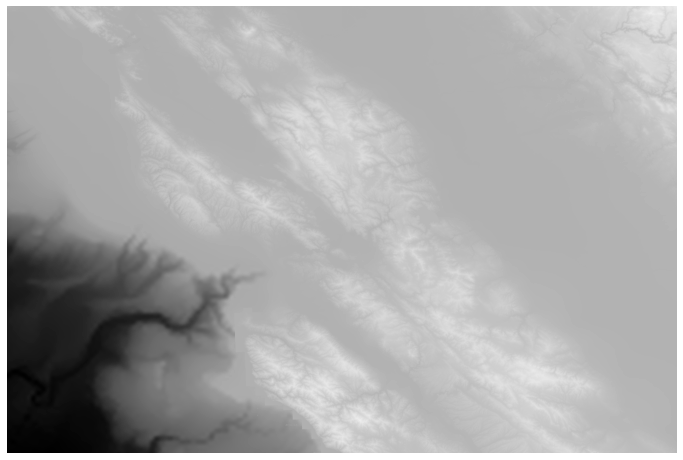

In [30]:
dem_midw = rio.open("/Users/mmorphew/cv_123w_36n_120w_38n.tif")
dem_array_midw = dem_midw.read(1).astype('float64')
fig, ax = plt.subplots(1, figsize=(12, 12))
show(dem_array_midw, cmap='Greys_r', ax=ax)
plt.axis('off')
plt.show()

In [52]:
dem_nw = rio.open("/Users/mmorphew/cv_123w_38n_120w_41n.tif")
dem_nw.bounds
#dem_array_nw = dem_nw.read(1).astype('float64')
#fig, ax = plt.subplots(1, figsize=(12, 12))
#show(dem_array_nw, cmap='Greys_r', ax=ax)
#plt.axis('off')
#plt.show()

BoundingBox(left=-123.00013888888888, bottom=38.00013888888889, right=-120.00013888888888, top=41.00013888888889)

In [60]:
dem_ne = rio.open("/Users/mmorphew/cv_120w_38n_118w_41n.tif")
print(dem_ne.bounds)
dem_ne.transform
#dem_array_ne = dem_ne.read(1).astype('float64')
#fig, ax = plt.subplots(1, figsize=(12, 12))
#show(dem_array_ne, cmap='Greys_r', ax=ax)
#plt.axis('off')
#plt.show()

BoundingBox(left=-120.00013888888888, bottom=38.00013888888889, right=-118.00013888888888, top=41.00013888888889)


Affine(0.0002777777777777778, 0.0, -120.00013888888888,
       0.0, -0.0002777777777777778, 41.00013888888889)

In [68]:
dem_se = rio.open("/Users/mmorphew/cv_120w_34.8n_118w_38n.tif")
print(dem_se.bounds)
dem_se.transform
dem_se.crs
#dem_array_se = dem_se.read(1).astype('float64')
#fig, ax = plt.subplots(1, figsize=(12, 12))
#show(dem_array_se, cmap='Greys_r', ax=ax)
#plt.axis('off')
#plt.show()

BoundingBox(left=-120.00013888888888, bottom=34.80013888888889, right=-118.00013888888888, top=38.00013888888889)


ERROR 1: PROJ: proj_identify: /Users/mmorphew/opt/anaconda3/envs/research/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]')

In [41]:
print(dem_array_se.shape)
print(dem_array_sw.shape)
print(dem_array_midw.shape)
print(dem_array_nw.shape)
print(dem_array_ne.shape)

(11520, 7200)
(4320, 10800)
(7200, 10800)
(10800, 10800)
(10800, 7200)


In [46]:
dem_array_w = np.vstack((dem_array_nw, dem_array_midw, dem_array_sw))
dem_array_e = np.vstack((dem_array_ne, dem_array_se))

In [47]:
dem_array_total = np.hstack((dem_array_w, dem_array_e))

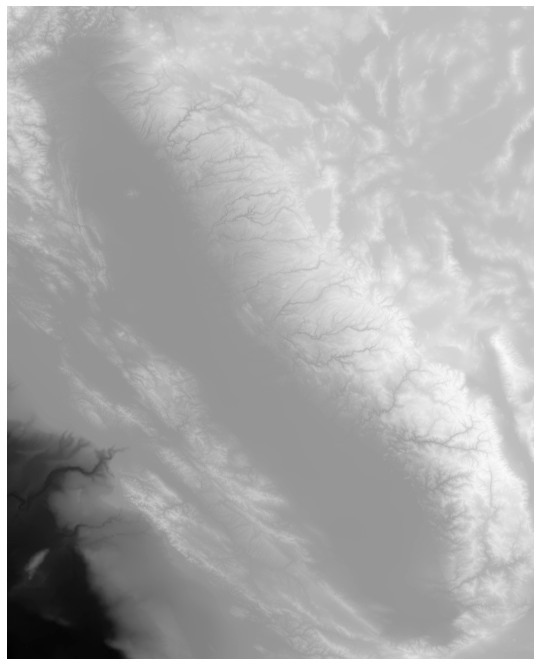

In [49]:
fig, ax = plt.subplots(1, figsize=(12, 12))
show(dem_array_total, cmap='Greys_r', ax=ax)
plt.axis('off')
plt.show()

In [7]:
total_bounds = [-123.00013888888888, 34.80013888888889, -118.00013888888888, 41.00013888888889]
crs = 4326

In [ ]:
from rasterio.transform import Affine
res_x = (x[-1] - x[0]) / 240.0
res_y = 
transform = Affine.translation(x[0] - res / 2, y[0] - res / 2) * Affine.scale(res, res)

In [8]:
from rasterio.transform import from_bounds
transform = from_bounds(total_bounds[0], total_bounds[1], total_bounds[2], 
                               total_bounds[3], dem_array_total.shape[1], 
                              dem_array_total.shape[0])

In [3]:
print(type(os.environ))
print(os.environ['PROJ_LIB'])

<class 'os._Environ'>


KeyError: 'PROJ_LIB'

In [4]:
crs = rio.crs.CRS.from_epsg(4326)

In [9]:
new_dataset = rio.open(
    './total_cv_dem_test.tif',
    'w',
    driver='GTiff',
    height=dem_array_total.shape[0],
    width=dem_array_total.shape[1],
    count=1,
    dtype=dem_array_total.dtype,
    crs=crs,
    transform=transform)

In [81]:
np.save('dem_array_csv_total', dem_array_total)

In [6]:
dem_array_total = np.load('dem_array_csv_total.npy')

In [10]:
new_dataset.write(dem_array_total, 1)

In [11]:
new_dataset.close()